### NMF
Factorize the nonnegative matrix $X$ as $X = WH$, where both $W$ and $H$ are nonnegative

### ONMF
Factorize the nonnegative matrix $X$ as $X = WH$, where both $W$ and $H$ are nonnegative and the rows of $H$ are orthogonal, i.e., $HH^T = I$.


### Refs
1. Lee, D. D., & Seung, H. S. (2001). Algorithms for non-negative matrix factorization. In Advances in neural information processing systems (pp. 556-562).

2. Choi, S. (2008, June). Algorithms for orthogonal nonnegative matrix factorization. In 2008 ieee international joint conference on neural networks (ieee world congress on computational intelligence) (pp. 1828-1832). IEEE.

3. Wang, Y. X., & Zhang, Y. J. (2012). Nonnegative matrix factorization: A comprehensive review. IEEE Transactions on Knowledge and Data Engineering, 25(6), 1336-1353.

### Warning
The codes here work for nonnegative matrices only.  For the case with negative elements, see snmf.py at https://github.com/nils-werner/pymf

### Codes

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def nmf(X, max_iter=1000, H_init=None, W_init=None):
        """
        Non-negative Matrix Factorization of X as X =WH.  
        Based on Ref. 1 and https://github.com/mstrazar/iONMF
        ----------
        Input
        ----------
        X: array [m x n]
            Data matrix to be factorized.
        max_iter: int
            Maximum number of iterations.
        H_init: array [m x m]
            Fixed initial basis matrix.
        W_init: array [m x n]
            Fixed initial coefficient matrix.
        ---------
        Output
        ---------
        W: array [m x m]
        H: array [m x n] 
        error: ||X-WH||
        """

        m, n = X.shape
        W = np.random.rand(m, m) if isinstance(W_init, type(None)) else W_init
        H = np.random.rand(m, n) if isinstance(H_init, type(None)) else H_init

        for itr in range(max_iter):
            # update H
            numerator = (W.T).dot(X)
            denominator = (W.T).dot(W.dot(H))
            H = np.nan_to_num(H * numerator/denominator)
            # update W
            numerator = X.dot(H.T)
            denominator = W.dot(H.dot(H.T))
            W = np.nan_to_num(W * numerator/denominator)
               
        error = np.linalg.norm( X-W.dot(H)) # error with Frobenius norm
        return W, H, error
    
    
    
def onmf(X, max_iter=2000, H_init=None, W_init=None):
        """
        Orthogonal Non-negative Matrix Factorization of X as X =WH wit HH^T=I.  
        Based on Ref. 3 and https://github.com/mstrazar/iONMF
        ----------
        Input
        ----------
        X: array [m x n]
            Data matrix to be factorized.
        max_iter: int
            Maximum number of iterations.
        H_init: array [m x m]
            Fixed initial basis matrix.
        W_init: array [m x n]
            Fixed initial coefficient matrix.
        MoreOrtho: Boolean 
            If True, searches for a matrix H with more zeros 
        ---------
        Output
        ---------
        W: array [m x m]
        H: array [m x n] 
        error: ||X-WH||
            factorization error
        o_error:  ||I-HH^T||
            orthogonality error
        """

        m, n = X.shape
        W = np.random.rand(m, m) if isinstance(W_init, type(None)) else W_init
        H = np.random.rand(m, n) if isinstance(H_init, type(None)) else H_init

        for itr in range(max_iter):
            # update H
            numerator = (W.T).dot(X)
            denominator = H.dot((X.T).dot(W.dot(H)))
            H = np.nan_to_num(H * numerator/denominator)
            
            # newline added to get orthonormalized rows
            row_norm = np.sqrt(np.diag(H.dot(H.T)))
            normalization_matrix = np.linalg.inv(np.diag(row_norm))
            H = normalization_matrix.dot(H)     

            
            # update W
            numerator = X.dot(H.T)
            denominator = W.dot(H.dot(H.T))
            W = np.nan_to_num(W * numerator/denominator)
               
        error = np.linalg.norm(X-W.dot(H)) # error with Frobenius norm
        o_error = np.linalg.norm(np.eye(m,m)-H.dot(H.T)) # orthogonality error with Frobenius norm
        return W, H, error, o_error

### Examples

#### NMF with random initialization

0.0001065904822459669


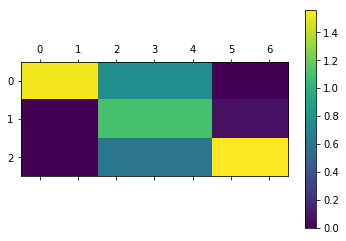

In [4]:
X = np.array([[2,2,1,1,1,0,0],[1,1,2,2,2,1,1], [0,0,1,1,1,2,2]])
W,H,e = nmf(X)
print(e)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(H)
fig.colorbar(cax)
plt.show()

#### NMF with inittial matrix based on SVD

0.012569523098450266


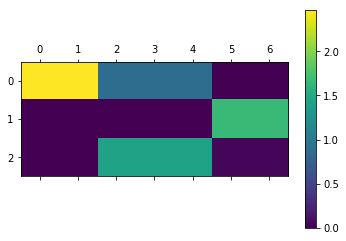

In [5]:
m,n = X.shape
# SVD
u,s,vh = np.linalg.svd(X)
# Initial matrix H
h_init= abs(vh[0:m,:])
# NMF
W,H,e = nmf(X, H_init = h_init)

print(e)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(H)
fig.colorbar(cax)
plt.show()

In [6]:
print(H)

[[2.46394952e+00 2.46394952e+00 8.81964071e-01 8.81964071e-01
  8.81964071e-01 4.80779354e-25 4.80779354e-25]
 [2.34806247e-18 2.34806247e-18 1.41270776e-15 1.20283756e-15
  1.20283756e-15 1.66932520e+00 1.66932520e+00]
 [3.40795667e-03 3.40795667e-03 1.42146287e+00 1.42146287e+00
  1.42146287e+00 4.27946302e-02 4.27946302e-02]]


#### ONMF with random initialization

0.0023045863937339807
0.002155912080934298


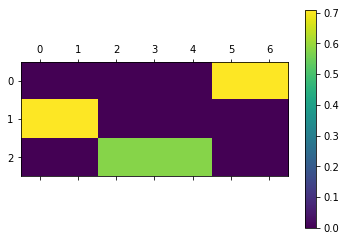

In [7]:
X = np.array([[2,2,1,1,1,0,0],[1,1,2,2,2,1,1], [0,0,1,1,1,2,2]])

W,H,e,oe = onmf(X)

print(e)
print(oe)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(H)
fig.colorbar(cax)
plt.show()

In [8]:
H.dot(H.T)

array([[1.00000000e+00, 2.40811767e-09, 1.08381855e-03],
       [2.40811767e-09, 1.00000000e+00, 1.07206147e-03],
       [1.08381855e-03, 1.07206147e-03, 1.00000000e+00]])

#### ONMF with inittial matrix based on SVD

0.0019825095293155644
0.001951194960647573
3 7


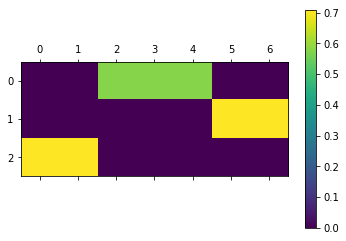

In [9]:
m,n = X.shape
# SVD
u,s,vh = np.linalg.svd(X)
# Initial matrix H
h_init= abs(vh[0:m,:])
# NMF
W,H,e,oe = onmf(X, H_init = h_init)

print(e)
print(oe)
print(m, n)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(H)
fig.colorbar(cax)
plt.show()

In [66]:
D=np.diag(H.dot(H.T))
D

array([1., 1., 1.])

In [46]:
HH=np.sqrt(np.diag(1/D)).dot(H)

In [47]:
HH.dot(HH.T)

array([[1.00000000e+00, 1.13218001e-03, 1.14769536e-03],
       [1.13218001e-03, 1.00000000e+00, 1.10392230e-17],
       [1.14769536e-03, 1.10392230e-17, 1.00000000e+00]])